<a href="https://colab.research.google.com/github/venky1602/breast-cancer/blob/main/Breast_cancer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔍 Missing Values:
 Class                      0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

🧹 Duplicates: 0

📊 Dataset Summary:
             Class  radius_mean 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


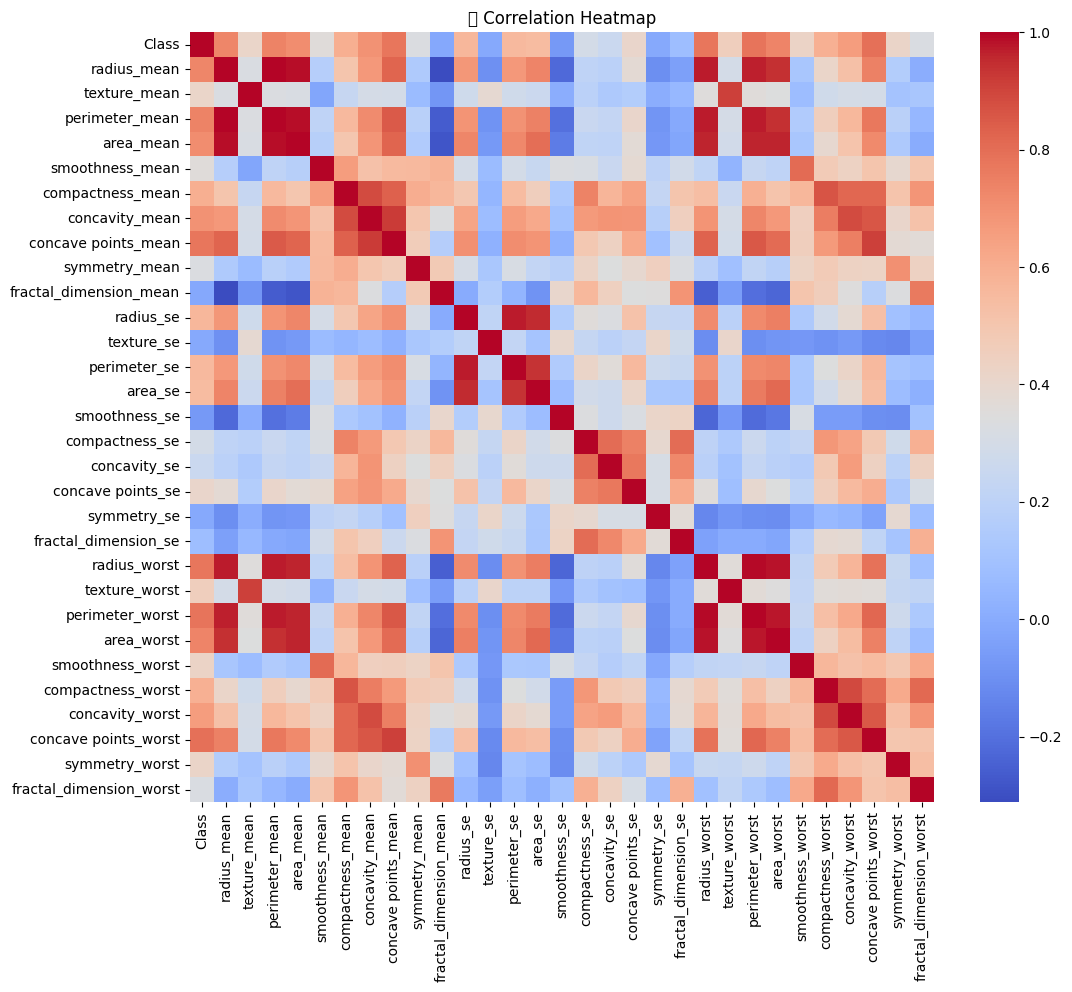


🧪 T-test on radius_mean: t = 25.44, p = 0.0000
✅ Statistically significant difference.

📁 Data split completed.
Train shape: (455, 30)
Test shape : (114, 30)


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Load the data
df = pd.read_csv("/content/breast-cancer.csv")

# 2. Drop ID column (not useful)
df.drop(columns=['id'], inplace=True)

# 3. Encode diagnosis column (target)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
df.rename(columns={'diagnosis': 'Class'}, inplace=True)

# 4. Check for missing values
print("🔍 Missing Values:\n", df.isnull().sum())

# 5. Check for duplicates
print("\n🧹 Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# 6. Summary statistics
print("\n📊 Dataset Summary:\n", df.describe())

# 7. Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("🔗 Correlation Heatmap")
plt.show()

# 8. Hypothesis Testing Example (malignant vs benign for radius_mean)
group_m = df[df['Class'] == 1]['radius_mean']
group_b = df[df['Class'] == 0]['radius_mean']

t_stat, p_val = ttest_ind(group_m, group_b)
print(f"\n🧪 T-test on radius_mean: t = {t_stat:.2f}, p = {p_val:.4f}")
if p_val < 0.05:
    print("✅ Statistically significant difference.")
else:
    print("❌ No significant difference.")

# 9. Train-Test Split
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n📁 Data split completed.")
print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)
